ELT - 578 ANÁLISE DE IMAGENS E VISÃO COMPUTACIONAL
WANDERSON LUIZ MOURA DE SOUZA - MA:115204
_______________________________________________________
Projeto final: Identificação de pacotes em esteira em tempo real
Uso de um modelo de classificação, realizando a deteção em uma parte da imagem


**Versão 2.2 24/03/2024

In [1]:
#Importando Bibliotecas
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import pathlib


In [2]:
#Parâmetros define parâmetros
batch_size = 32
img_height = 260
img_width = 200

In [10]:
cd ..

C:\


In [13]:
#Configurando dados na unidade C: (Lembra de apagar essa pasta depois)
os.chdir(r"C:\Users\wanlu\img_classificacao")

In [14]:
#Dados para treinamento
data_dir = pathlib.Path(r'C:\Users\wanlu\img_classificacao')

#Indicando diretório e quantidade de fotos
image_count = len(list(data_dir.glob('*\*.jpg')))
pastas = os.listdir(data_dir)

print("Diretorio das imagens: ", data_dir,
      "\nQuantidade de imagens: ", image_count,
      "\nQuantidade de Classes: ", len(pastas))

Diretorio das imagens:  C:\Users\wanlu\img_classificacao 
Quantidade de imagens:  919 
Quantidade de Classes:  5


In [15]:
#Separando imagens para treino e teste
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 919 files belonging to 5 classes.
Using 736 files for training.


In [16]:
#Separando imagens para treino e teste
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 919 files belonging to 5 classes.
Using 183 files for validation.


In [17]:
#Indicar todas as classes presentes
class_names = train_ds.class_names

#Salvando um txt com os nomes das classes
with open(r'G:\Outros computadores\PC\Documents\Wanderson\Profissional\CURSOS\POS INTELIGENCIA COMPUTACIONAL UFV\ELT 578 - ANÁLISE DE IMAGENS E VISÃO COMPUTACIONAL\Ultima_tentativa\info\classes.txt', 'w') as arquivo:
    for classe in class_names:
        arquivo.write(classe + '\n')

print(class_names)


['pacote_3c', 'pacote_cinza', 'pacote_extraforte', 'pacote_fort', 'zero_pacote']


In [18]:
#Indicando forma dos dados no primeiro lote
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 260, 200, 3)
(32,)


In [19]:
#Otimização
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [20]:
#Variável de normalização
normalization_layer = layers.Rescaling(1./255)

In [21]:
#Normalização dos dados
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.00031105118 0.99679023


In [22]:
#Aumento de dados de treinamento e validação
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

In [23]:
#Parametrizando o modelo
num_classes = len(class_names)

model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [24]:
#Copilando modelo
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [25]:
#Apresentando Sumário do modelo
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 260, 200, 3)       0         
                                                                 
 rescaling_1 (Rescaling)     (None, 260, 200, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 260, 200, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 130, 100, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 130, 100, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 65, 50, 32)        0         
 g2D)                                                 

In [26]:
#Iniciando o treinamento do modelo
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10


23/23 [==============================] - 11s 417ms/step - loss: 0.9946 - accuracy: 0.6481 - val_loss: 0.4233 - val_accuracy: 0.8634
Epoch 2/10
23/23 [==============================] - 9s 389ms/step - loss: 0.3539 - accuracy: 0.8451 - val_loss: 0.1739 - val_accuracy: 0.9672
Epoch 3/10
23/23 [==============================] - 9s 385ms/step - loss: 0.1595 - accuracy: 0.9429 - val_loss: 0.0685 - val_accuracy: 0.9945
Epoch 4/10
23/23 [==============================] - 9s 380ms/step - loss: 0.0743 - accuracy: 0.9796 - val_loss: 0.0866 - val_accuracy: 0.9454
Epoch 5/10
23/23 [==============================] - 9s 390ms/step - loss: 0.2374 - accuracy: 0.9334 - val_loss: 0.1247 - val_accuracy: 0.9508
Epoch 6/10
23/23 [==============================] - 9s 383ms/step - loss: 0.0953 - accuracy: 0.9769 - val_loss: 0.0405 - val_accuracy: 0.9945
Epoch 7/10
23/23 [==============================] - 9s 377ms/step - loss: 0.0281 - accuracy: 0.9959 - val_loss: 0.0067 - val_accuracy: 1.0000
Epoch 8/10
23/23

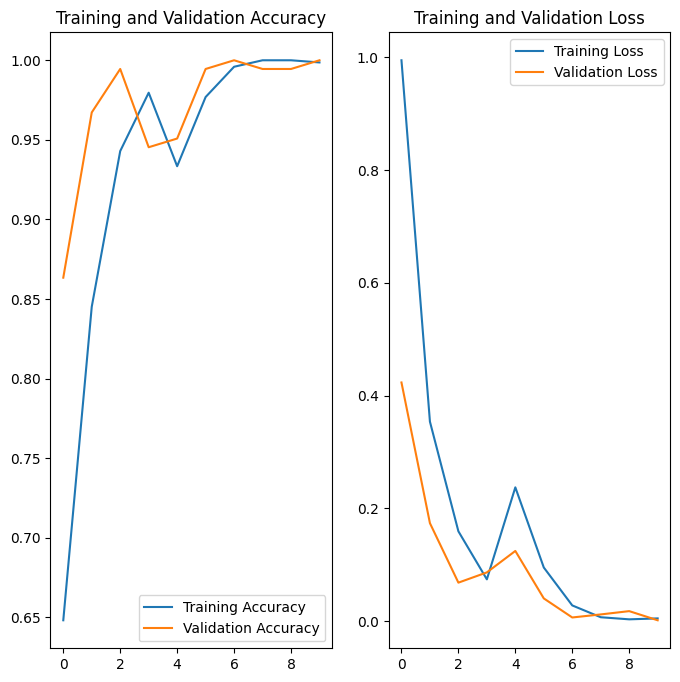

In [27]:
#Avaliando os dados de treino
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [28]:
# Salvar modelo
model.save(r'G:\Outros computadores\PC\Documents\Wanderson\Profissional\CURSOS\POS INTELIGENCIA COMPUTACIONAL UFV\ELT 578 - ANÁLISE DE IMAGENS E VISÃO COMPUTACIONAL\Ultima_tentativa\model\modelo_cafe_3.keras')
print('Modelo Salvo!')

Modelo Salvo!


*******************************************************************
Realizando uma classificação!

In [ ]:
#Carrega modelo
from tensorflow.keras.models import load_model
model = load_model()

#Passa pesos
img_height = 260
img_width = 200

#Carrega classes
class_names = []
#Abre TXT e passa todos as linhas para a variável
with open('G:\Outros computadores\PC\Documents\Wanderson\Profissional\CURSOS\POS INTELIGENCIA COMPUTACIONAL UFV\ELT 578 - ANÁLISE DE IMAGENS E VISÃO COMPUTACIONAL\Ultima_tentativa\info\classes.txt', 'r') as arquivo:
    for linha in arquivo:
        classe = linha.strip()
        class_names.append(classe)
        
print("Modelo Carregado! \nClasses Carregadas!")

In [31]:
#Realiza predição
# Validando modelo
dir_img = r"G:\Outros computadores\PC\Documents\Wanderson\Profissional\CURSOS\POS INTELIGENCIA COMPUTACIONAL UFV\ELT 578 - ANÁLISE DE IMAGENS E VISÃO COMPUTACIONAL\Ultima_tentativa\valid\T (11).jpg"

img = tf.keras.utils.load_img(
    dir_img, target_size=(img_height, img_width))
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

if np.max(score) < 0.5:
    print("Imagem não identificada.")
else:
    print(
        "Imagem identificada! \nClasse:  {} \nAcuracia:  {:.2f} %."
        .format(class_names[np.argmax(score)], 100 * np.max(score))
    )

1/1 [==============================] - 0s 39ms/step
Imagem identificada! 
Classe:  zero_pacote 
Acuracia:  99.96 %.
